In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import gelu

In [19]:
diabetes_data = pd.read_csv('../diabetes.csv')
diabetes_data = diabetes_data.drop(columns=['FPG', 'FFPG', 'ALT', 'Tri', 'CCR','BUN'])
diabetes_data.head()

,Age,Gender,BMI,SBP,DBP,Chol,HDL,LDL,smoking,drinking,family_history,Diabetes
0,26,1,20.1,119,81,4.36,0.90,2.43,3.0,3.0,0,0
1,40,1,17.7,97,54,3.70,1.50,2.04,1.0,1.0,0,0
2,40,2,19.7,85,53,5.87,1.75,3.37,3.0,3.0,0,0
3,43,1,23.1,111,71,4.05,1.27,2.60,2.0,3.0,0,0
4,36,1,26.5,130,82,6.69,0.91,3.64,3.0,3.0,0,0


In [20]:
# Separate features and target variable
X = diabetes_data.drop(columns=['Diabetes'])
y = diabetes_data['Diabetes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63) # 63

# Standardizing the dataset (especially for SVM and k-NN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Creating and training the ANN model

In [21]:
# Define Neural Network Model
model = Sequential([
    Dense(128, activation=gelu, input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation=gelu),
    Dropout(0.4),
    Dense(32, activation=gelu),
    Dense(16, activation=gelu),
    Dense(1, activation='sigmoid')
])

/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1. Input Layer
 - The input shape is defined as (X_train.shape[1],) which indicates that the number of input features is determined by the number of columns in X_train. This shape serves as the input dimension to the first dense layer.
 - Example: If you have 10 features in your data, this will translate to an input size of 10.
2. Hidden Layers
 - First Hidden Layer
    - Layer Type: Dense (fully connected) layer with 128 neurons.
    - Activation Function: gelu (Gaussian Error Linear Unit).
        - introduce non-linearity, which helps the model learn complex patterns.
    - Regularization: Followed by a Dropout layer with a dropout rate of 0.5.
    - This means that during training, 50% of the neurons in this layer are randomly ignored (dropped) at each iteration, which helps prevent overfitting by introducing some noise and reducing reliance on particular neurons.
 - Second Hidden Layer
    - Layer Type: Dense layer with 64 neurons.
    - Activation Function: gelu.
    - Regularization: Followed by another Dropout layer with a rate of 0.4.
 - Third Hidden Layer
    - Layer Type: Dense layer with 32 neurons.
    - Activation Function: gelu.
 - Fourth Hidden Layer
    - Layer Type: Dense layer with 16 neurons.
    - Activation Function: gelu.
3. Output Layer
 - Layer Type: Dense layer with 1 neuron.
 - Activation Function: Sigmoid.
 - Since the task is a binary classification problem (predicting whether someone has diabetes or not), the output is a single value in the range [0, 1] produced by the sigmoid function. This value represents the predicted probability that the input belongs to the positive class (e.g., having diabetes).

In [22]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=500, batch_size=32, callbacks=[early_stop])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Neural Network Test Accuracy: {test_accuracy:.4f}')

Epoch 1/500
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6625 - loss: 0.6647 - val_accuracy: 0.8679 - val_loss: 0.5981
Epoch 2/500
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.8384 - loss: 0.5747 - val_accuracy: 0.8926 - val_loss: 0.4699
Epoch 3/500
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.9035 - loss: 0.4324 - val_accuracy: 0.9028 - val_loss: 0.3410
Epoch 4/500
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.8946 - loss: 0.3435 - val_accuracy: 0.9086 - val_loss: 0.2792
Epoch 5/500
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.9086 - loss: 0.2839 - val_accuracy: 0.9158 - val_loss: 0.2440
Epoch 6/500
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.9119 - loss: 0.2551 - val_accuracy: 0.9231 - val_loss: 0.2246
Epoch 7/500
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.9219 - loss: 0.2293 - val_accuracy: 0.9260 - val_loss: 0.2132
Epoch 8/500
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.9144 - loss: 0.2363 - val_accura

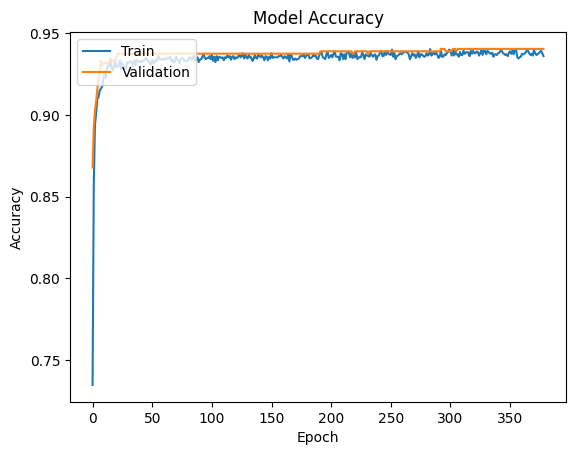

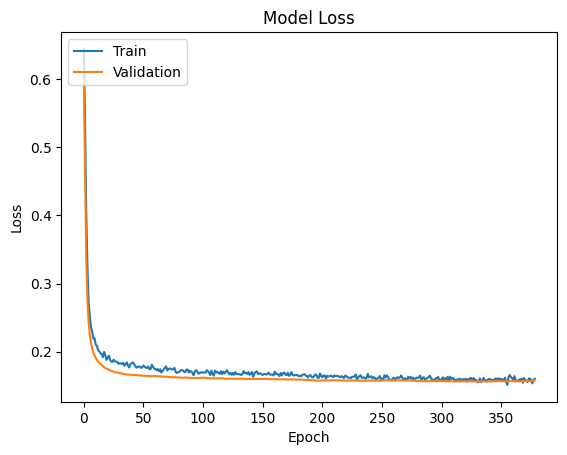

In [23]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Evaulating trained model

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


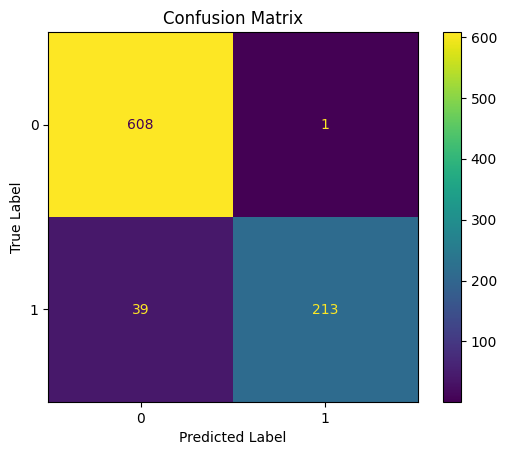

Accuracy: 0.9535
Precision: 0.9953
Recall: 0.8452
F1 Score: 0.9142


In [24]:
# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)  # Convert probabilities to binary class labels (0 or 1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Individual metric calculations
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

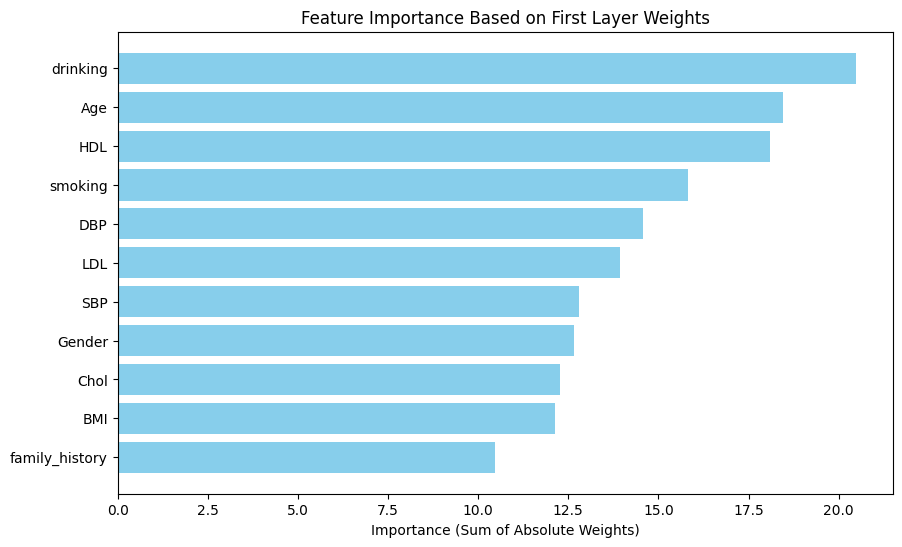

In [25]:
first_layer_weights, _ = model.layers[0].get_weights()

# Calculate the absolute sum of weights for each feature
# (Taking the absolute value as weights can be positive or negative)
feature_importance = np.sum(np.abs(first_layer_weights), axis=1)

# Assuming `X` has column names (features), create a DataFrame for easy visualization
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance (Sum of Absolute Weights)')
plt.title('Feature Importance Based on First Layer Weights')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

In [26]:
# Demo Code
Diag_Age = 65
Diag_Gender = 2  # 1 = Male, 2 = Female
Diag_BMI = 16.4
Diag_SBP = 113
Diag_DBP = 61
Diag_Chol = 2.78
Diag_HDL = 1.09
Diag_LDL = 3.61
Diag_smoking = 0  # 1 = current smoker, 2 = ever smoker, 3 = never smoked
Diag_drinking = 0  # 1 = current drinker, 2 = ever drinker, 3 = never drank
Diag_famhis = 1

# Define the diagnostic metrics array
diag_metrics = np.array([[Diag_Age, Diag_Gender, Diag_BMI, Diag_SBP, Diag_DBP, Diag_Chol, Diag_HDL, Diag_LDL, Diag_smoking, Diag_drinking, Diag_famhis]])

# Load model first, then use this function
def predict_diabetes(P_metrics):
    # Reshape the metrics for a single prediction
    P_metrics = np.array(P_metrics).reshape(1, -1)
    Diag_confidence = model.predict(P_metrics)[0][0]

    # Interpretation based on threshold
    if Diag_confidence >= 0.5:
        return "Likely Diabetic", Diag_confidence
    else:
        return "Likely Non-Diabetic", Diag_confidence

# Call function with diag_metrics
Dstatus, Dprob = predict_diabetes(diag_metrics)
print(f"Prediction: {Dstatus} (Probability: {Dprob:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction: Likely Diabetic (Probability: 1.00)


### Conclusion

The ANN model performs quite well on the dataset higher accuracy and F1 score.